<a href="https://colab.research.google.com/github/paul-williams-ch-ml/ML/blob/master/clustering/K-Means%20%26%20Mini-Batch%20K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means & Mini-Batch K-Means
**sklearn.cluster.KMeans** is the standard K-Means clusturing function. When it is used, all data must be loaded into memory for processing. This is fine if you have small datasets that easily fit into the RAM memory of your system. If the dataset is greater than the physical RAM of your system, then you should consider using **sklearn.cluster.MiniBatchKMeans**. This will give similar results an KMean, but will process that dataset in small batches and then combine to results.

First we import the Iris dataset and print out the column headers.

In [0]:
from sklearn.datasets import load_iris

In [5]:
data     = load_iris()
print("Features :%s" % data.feature_names)
features = data.data
labels   = data.target

Features :['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## K-Means

In [0]:
from sklearn.cluster import KMeans

In [7]:
k_means = KMeans(n_clusters   = 3, \
                 init         = 'k-means++', \
                 max_iter     = 999, \
                 n_init       = 1, \
                 random_state = 101)

k_means.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=999,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

Import matplotlib so that we may plot our results

**NOTE: ** %matplotlib inline   is a Notebook command which allows the plots to be embeded directly into the Notebook.


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

Plot our K-Means results

**NOTE: **The cluster data remains the same in both cases. But the cluster centers are slightly different.

**NOTE: **The centers of each cluster are marked with a blue square.

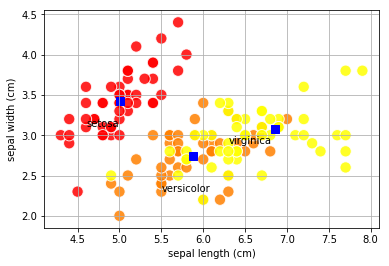

In [27]:
plt.scatter(features[:,0], \
            features[:,1], \
            s          = 2**7, \
            c          = labels, \
            edgecolors = 'white', \
            alpha      = 0.85, \
            cmap       = 'autumn')

plt.scatter(k_means.cluster_centers_[:,0], \
            k_means.cluster_centers_[:,1], \
            s      = 2**6, \
            marker = 's', \
            c      = 'blue')

for class_no in range(0,3): 
  plt.annotate(data.target_names[class_no], \
               (features[3+50*class_no,0], \
                features[3+50*class_no,1]))

plt.grid() 

plt.xlabel(data.feature_names[0]) 
plt.ylabel(data.feature_names[1]) 
  
plt.show() 

## Mini-Batch K-Means

In [0]:
from sklearn.cluster import MiniBatchKMeans

In [19]:
mb_k_means = MiniBatchKMeans(n_clusters   = 3, \
                             init         = 'k-means++', \
                             max_iter     = 999, \
                             batch_size   = 10, \
                             n_init       = 1, \
                             random_state = 101)

mb_k_means.fit(features)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
        init_size=None, max_iter=999, max_no_improvement=10, n_clusters=3,
        n_init=1, random_state=101, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

Plot our Mni Batch K-Means results

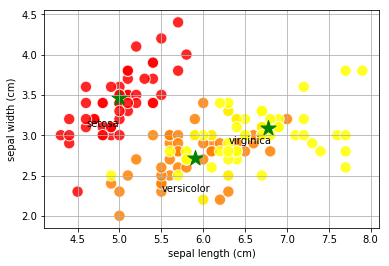

In [25]:
plt.scatter(features[:,0], \
            features[:,1], \
            s          = 2**7, \
            c          = labels, \
            edgecolors = 'white', \
            alpha      = 0.85, \
            cmap       = 'autumn')

plt.scatter(mb_k_means.cluster_centers_[:,0], \
            mb_k_means.cluster_centers_[:,1], \
            s      = 2**8, \
            marker = '*', \
            c      = 'green')

for class_no in range(0,3): 
  plt.annotate(data.target_names[class_no], \
               (features[3+50*class_no,0], \
                features[3+50*class_no,1]))
  
plt.grid() 

plt.xlabel(data.feature_names[0]) 
plt.ylabel(data.feature_names[1]) 
  
plt.show() 

## Overlay of Results

The difference is almost impossible to see.

So, here we overlay both the K-Means & Mini Batch K-Means centers.



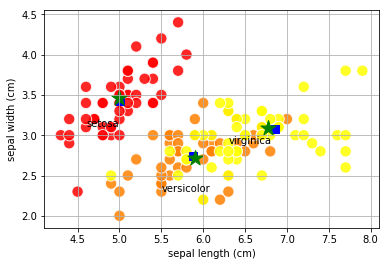

In [28]:
plt.scatter(features[:,0], \
            features[:,1], \
            s          = 2**7, \
            c          = labels, \
            edgecolors = 'white', \
            alpha      = 0.85, \
            cmap       = 'autumn')


plt.scatter(k_means.cluster_centers_[:,0], \
            k_means.cluster_centers_[:,1], \
            s      = 2**6, \
            marker = 's', \
            c      = 'blue')

plt.scatter(mb_k_means.cluster_centers_[:,0], \
            mb_k_means.cluster_centers_[:,1], \
            s      = 2**8, \
            marker = '*', \
            c      = 'green')

for class_no in range(0,3): 
  plt.annotate(data.target_names[class_no], \
               (features[3+50*class_no,0], \
                features[3+50*class_no,1]))
  
plt.grid() 

plt.xlabel(data.feature_names[0]) 
plt.ylabel(data.feature_names[1]) 
  
plt.show()